## installation

In [6]:
pip install torch==1.11.0

In [76]:
pip install  fastai==1.0.5

In [1]:
import os
path = '/kaggle/input/chest-xray-pneumonia/chest_xray/'
print(os.listdir(path))

['chest_xray', '__MACOSX', 'val', 'test', 'train']


## Set up path for train data

In [2]:
from pathlib import Path

path2 = '/kaggle/input/chest-xray-pneumonia/chest_xray/' + 'train/'
path_train = Path(path2)
ls = [i for i in path_train.iterdir()]
ls

[PosixPath('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA'),
 PosixPath('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL')]

## Data Loading for training

In [5]:
from fastai.vision.all import *
datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=40),
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)]
)
# DataLoaders
dls = datablock.dataloaders(path, num_workers=4)

## Data Explorations

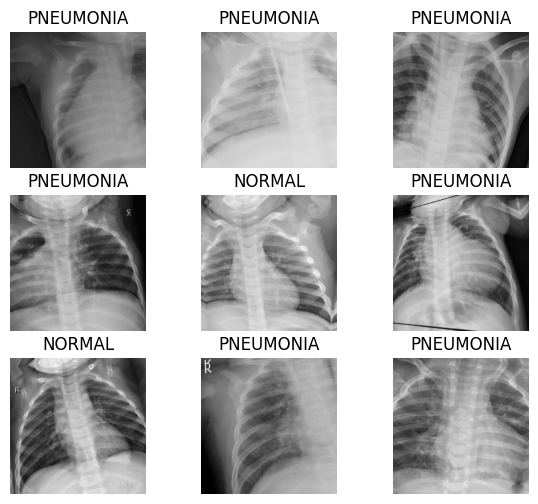

In [32]:
dls.show_batch(max_n=9, figsize=(7,6))

In [45]:
print(f'Num classes : {dls.c}')

Num classes : 2


## Create Model

In [50]:
from fastai.vision import cnn_learner
from fastai.metrics import accuracy
from fastai.vision import models


learn = cnn_learner(dls, models.resnet50, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

## Finding LR

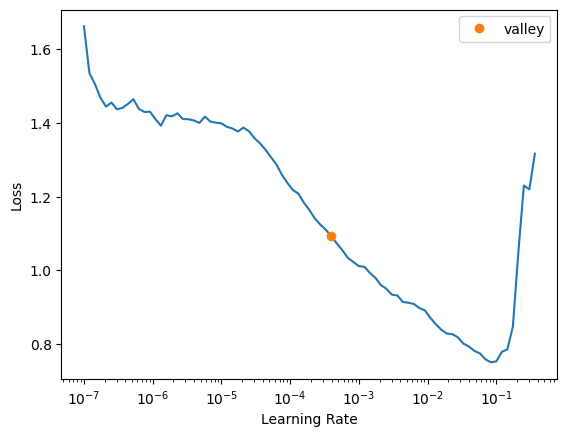

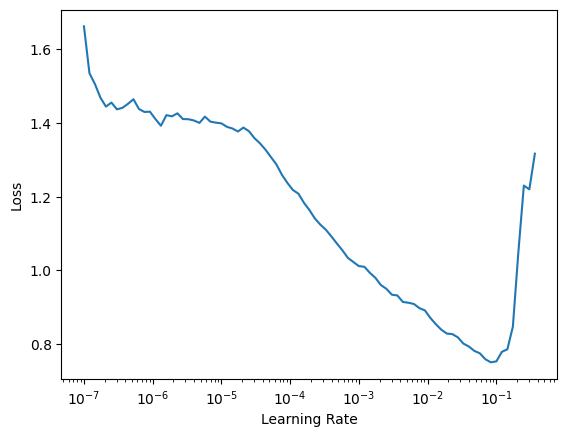

In [52]:
learn.lr_find()
learn.recorder.plot_lr_find()

## Training

In [53]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.488771,0.642661,0.920581,04:35
1,0.179746,0.299579,0.948762,04:33
2,0.105349,0.071717,0.976516,04:33
3,0.075552,0.066284,0.978224,04:33


## Hyper Parameter Tuning

AttributeError: 'Sequential' object has no attribute 'plot'

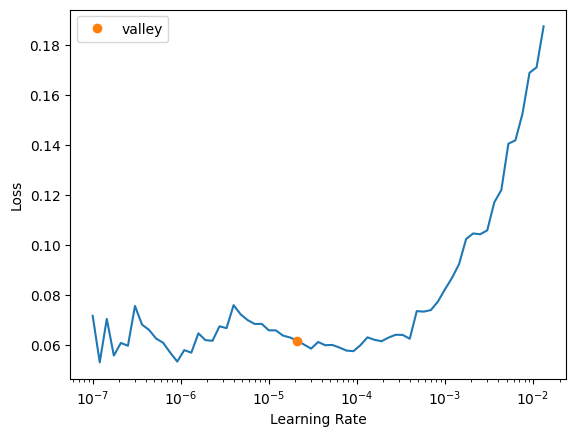

In [54]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

## Evaluate

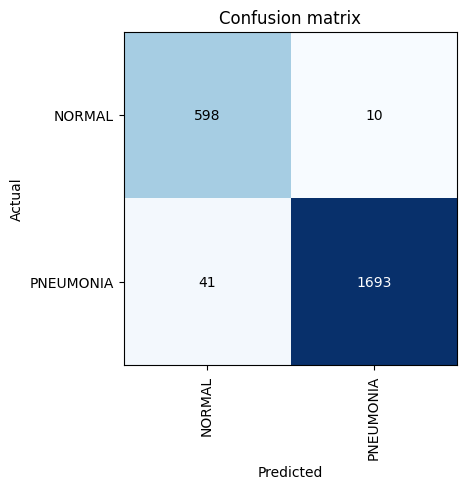

In [62]:
from fastai.vision.interpret import ClassificationInterpretation

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [68]:
confusion_matrix = interp.confusion_matrix()

In [69]:
confusion_matrix

array([[ 598,   10],
       [  41, 1693]])

In [71]:
Accuracy =   (1693 + 598) / 2342
print(f'Accuracy : {round(Accuracy , 3)}')

Accuracy : 0.978


## Display img

In [93]:
from PIL import Image
img = Image.open('/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg')

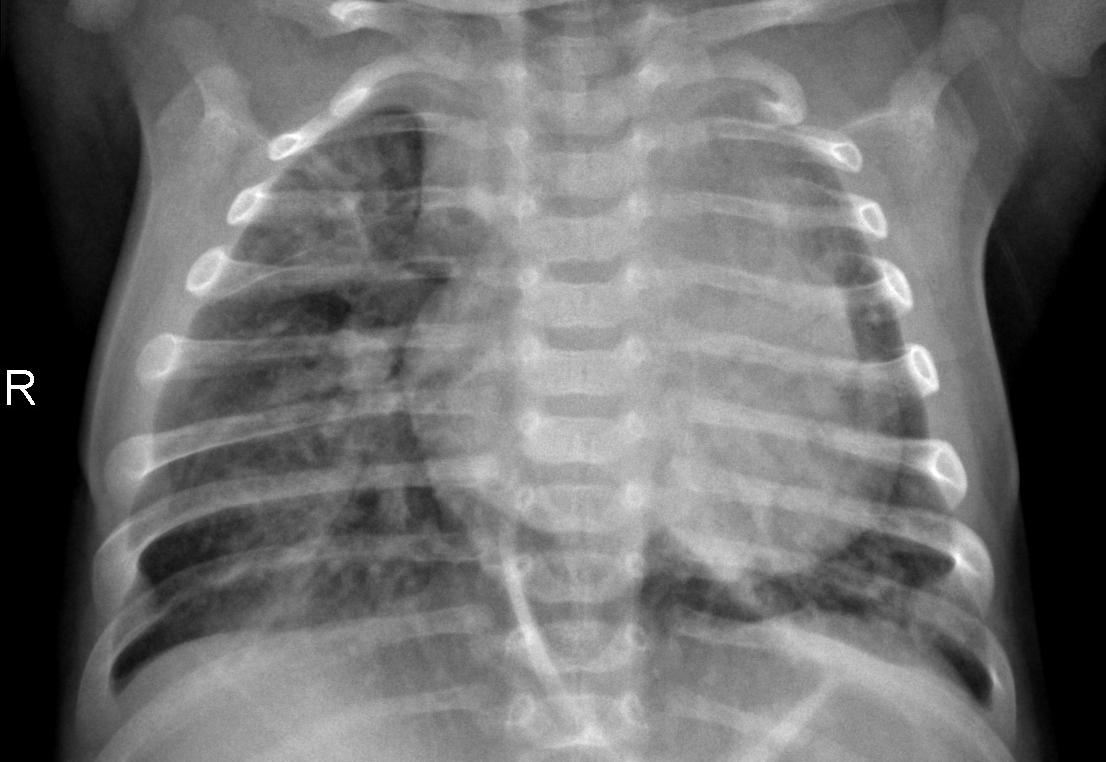

In [95]:
img

## Make Prediction

In [122]:
def predict(img):
    prediction = learn.predict(img)
    prediction_label = prediction[0]
    prediction_index = int(prediction[1])
    prediction_probability = float(prediction[2][prediction_index])
    
    Dict = {
        'prediction_label' : prediction_label,
        'prediction_index' : prediction_index,
        'prediction_probability' :  round(prediction_probability , 3) }
    return Dict

In [123]:
prediction = predict(img)
prediction

{'prediction_label': 'PNEUMONIA',
 'prediction_index': 1,
 'prediction_probability': 0.995}

## Save & Load Model

In [139]:
learn.export(fname=Path("/kaggle/working/export.pkl"))
learn.model_dir = "/kaggle/working"
learn.save("stage-1")

Path('/kaggle/working/stage-1.pth')

In [144]:
from fastai.learner  import load_learner

learn_loaded = load_learner("/kaggle/working/export.pkl")

## Test Prdiction

In [ ]:
def predict(img):
    learn_loaded = learn.predict(img)
    prediction_label = prediction[0]
    prediction_index = int(prediction[1])
    prediction_probability = float(prediction[2][prediction_index])
    
    Dict = {
        'prediction_label' : prediction_label,
        'prediction_index' : prediction_index,
        'prediction_probability' :  round(prediction_probability , 3) }
    return Dict

In [ ]:
from PIL import Image
img = Image.open('/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg')
img

In [ ]:
prediction = predict(img)
prediction

In [ ]:
https://www.kaggle.com/code/arbazkhan971/pneumonia-detection-using-cnn-96-accuracy/input
https://www.kaggle.com/code/studentmustafaai/notebook2f3e632533/edit
https://www.kaggle.com/code/studentmustafaai/notebook2f3e632533